Saving Heart Disease data.csv to Heart Disease data (1).csv
Heart Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values Count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset Summary:
               age          sex           cp    

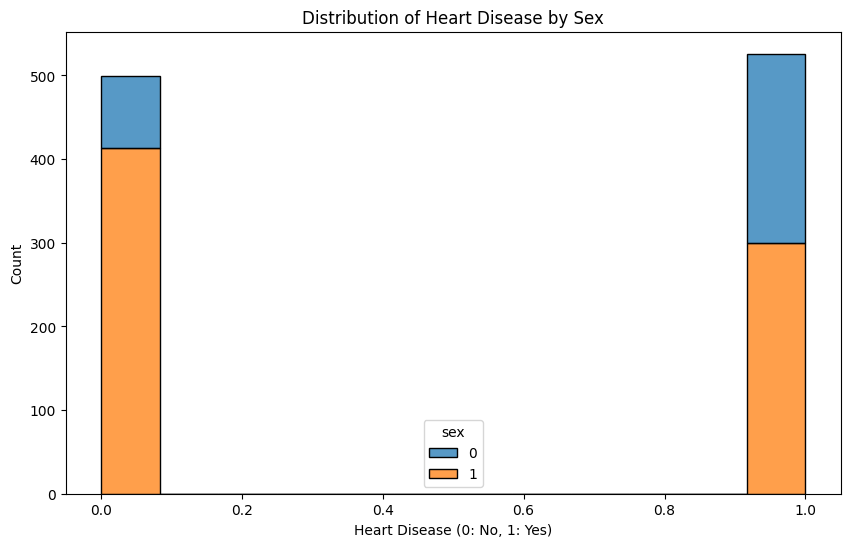

<Figure size 1000x800 with 0 Axes>

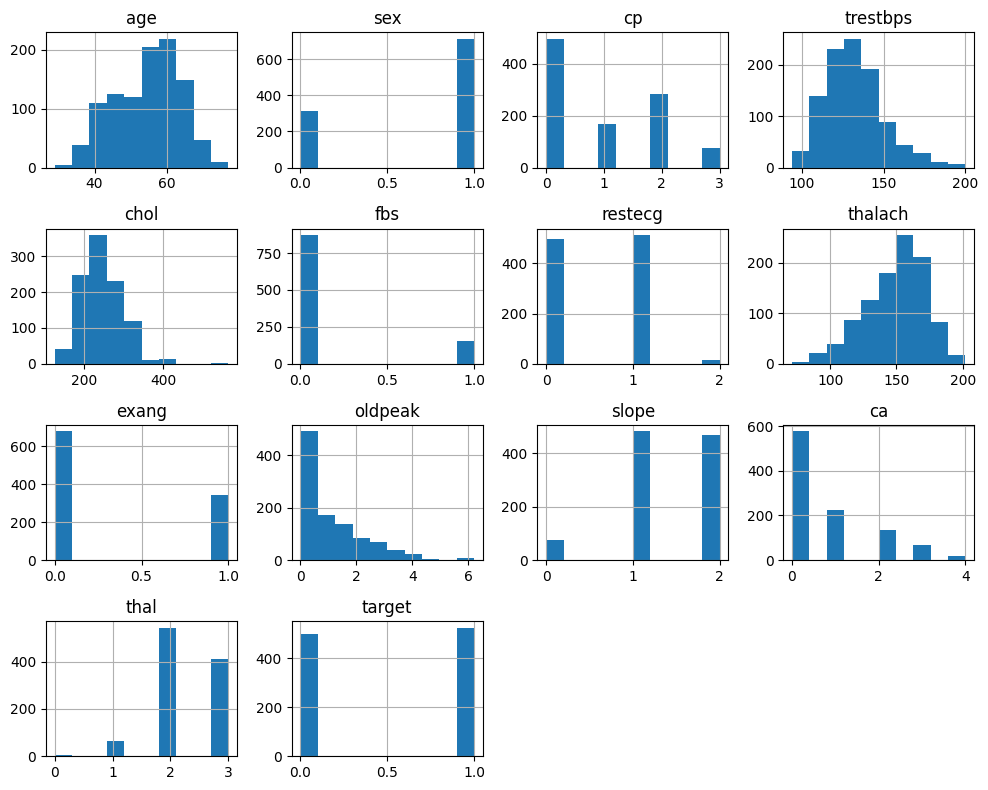

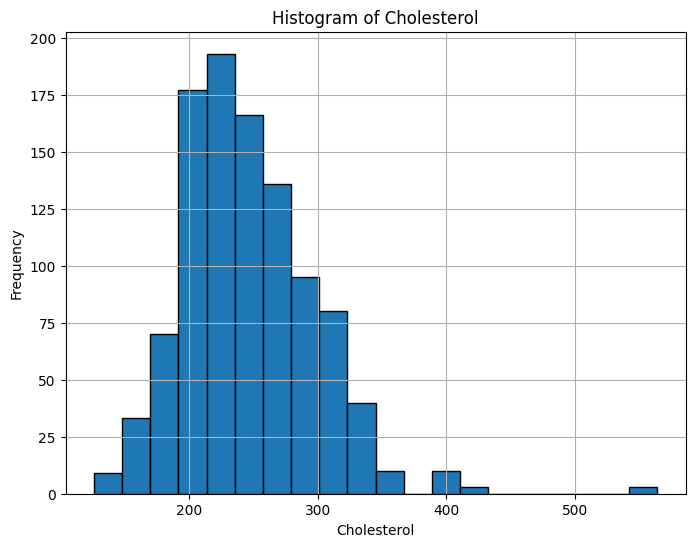

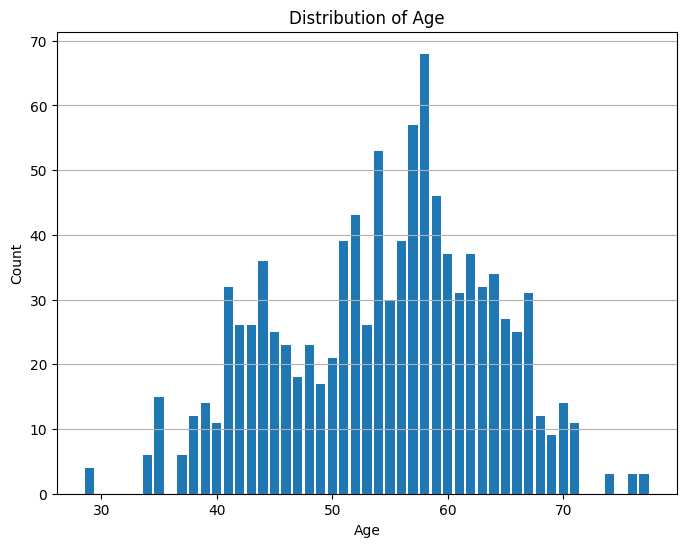

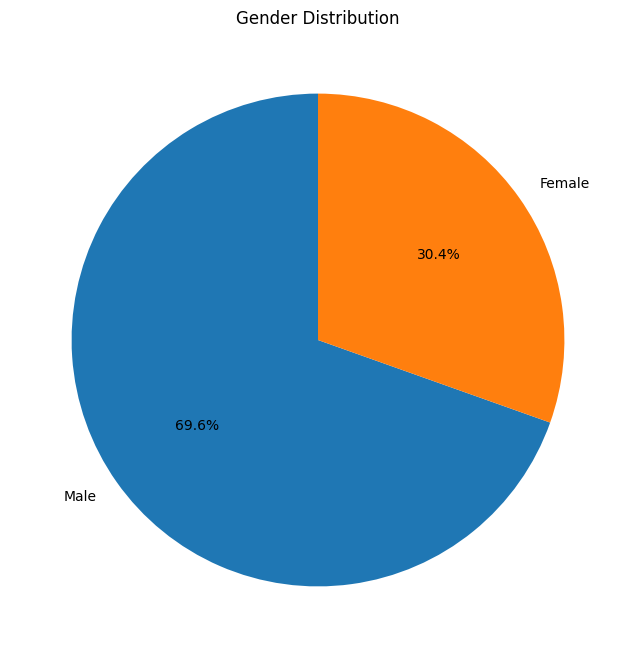

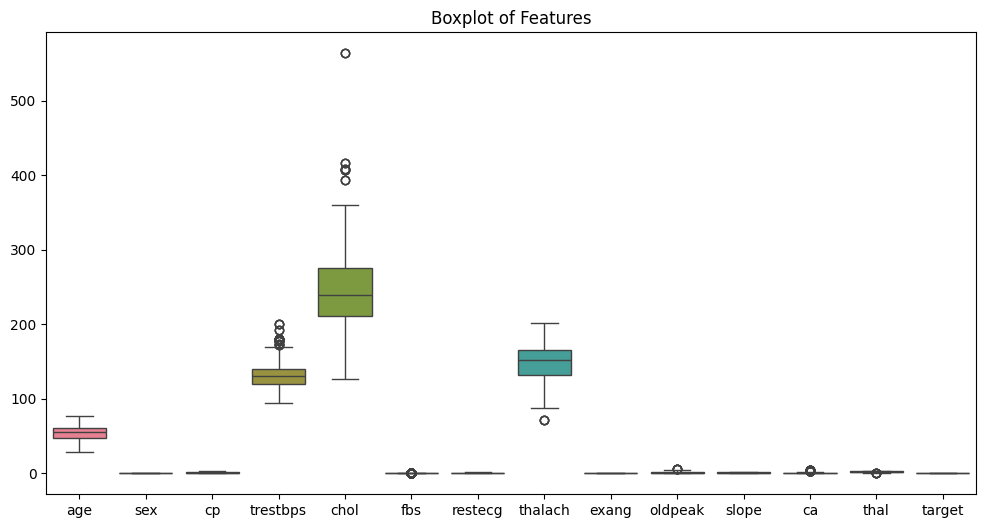

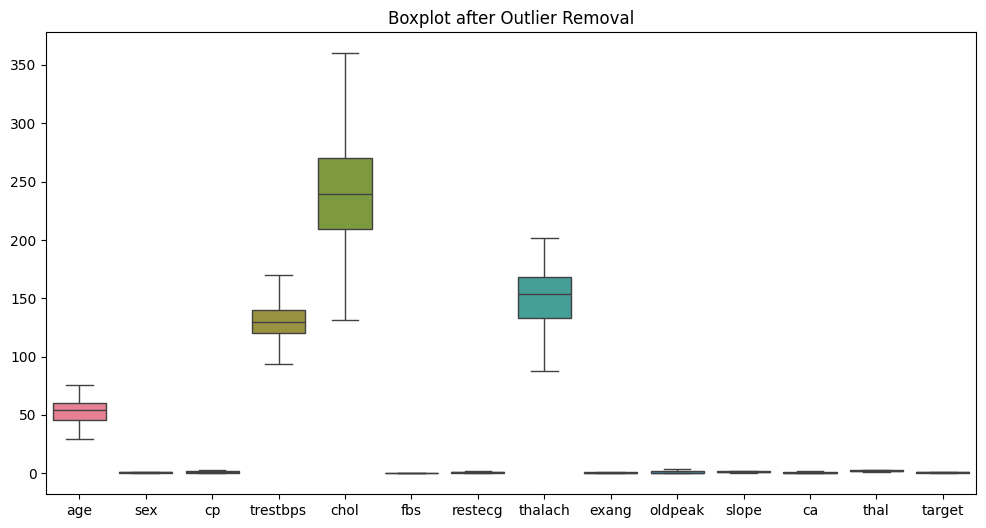

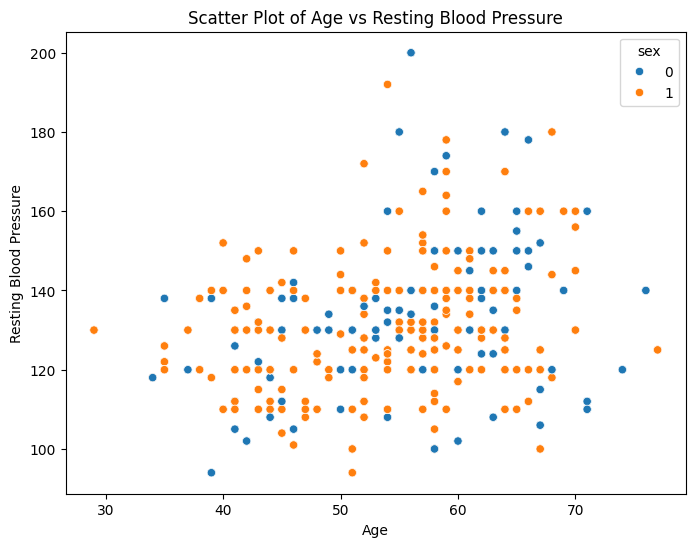

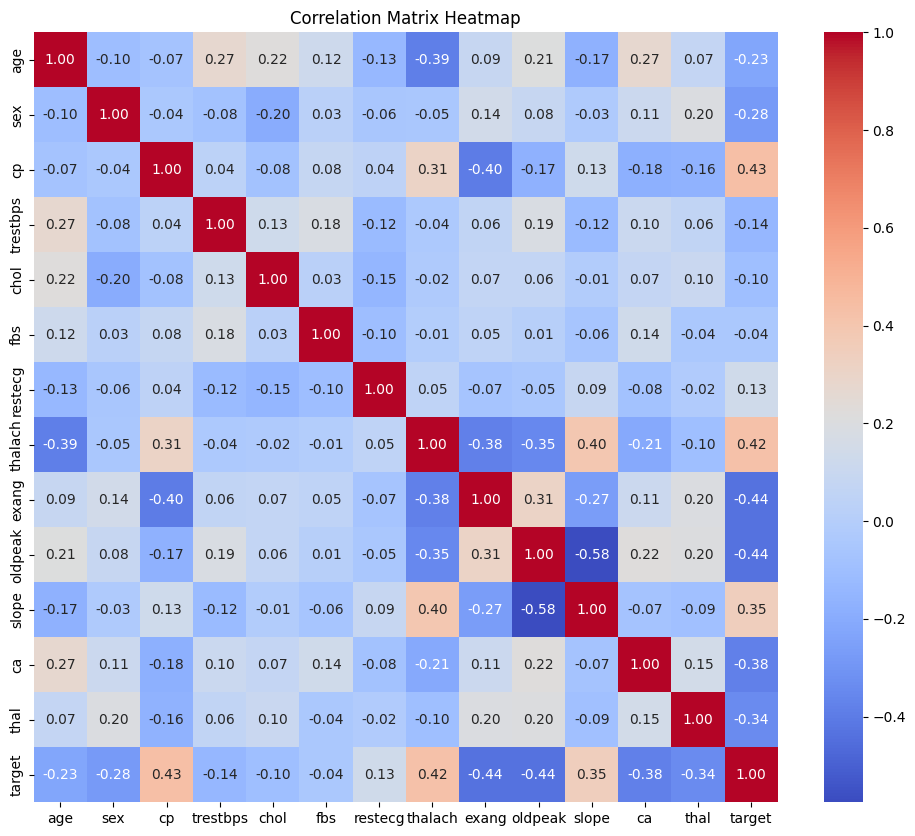

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv('/content/Heart Disease data.csv')

# Display dataset information
print("Heart Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Statistical summary
print("\nDataset Summary:")
print(df.describe())

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='target', hue='sex', multiple='stack')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Sex')
plt.show()

# Histograms
plt.figure(figsize=(10, 8))
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Cholesterol Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['chol'], bins=20, edgecolor='black')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.grid(True)
plt.show()

# Age Distribution Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(df['age'].value_counts().sort_index().index, df['age'].value_counts().sort_index().values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.grid(axis='y')
plt.show()

# Sex Distribution Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df['sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()

# Removing Outliers using IQR Method
numerical_features = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data)
plt.title('Boxplot after Outlier Removal')
plt.show()

# Save cleaned data
filtered_data.to_csv('filtered_data.csv', index=False)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='trestbps', data=df, hue='sex')
plt.title('Scatter Plot of Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting Data
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
